In [31]:
import numpy as np
import pandas as pd

In [85]:
netflix_df = pd.read_csv("data.csv")
netflix_df_copy = netflix_df

In [33]:
netflix_df[1:10]

show_id     type  title           director  \
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating  duration  \
1  December 23, 2016          2016  TV-MA    93 min   
2  December 20, 2018          2011      R    78 min   
3  November 16, 2017          2009  PG-13    80 min   
4    January 1, 2020          2008  PG-13   123 min   
5       July 1, 2017          2016  TV-MA  1 Season   
6       June 1, 2020          2019  TV-MA    95 min   
7   November 1, 2019          1997      R   119 min   
8      April 1, 2019          2019  TV-14   118 min   
9  December 15, 2017          2008  TV-MA   143 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

In [34]:
categories = []
for i in range(len(netflix_df)):
    categories.extend(netflix_df.listed_in.iloc[i].split(','))

for i in range(len(categories)):
    categories[i] = categories[i].strip()
    
categories_dict = {}
for i in categories:
    categories_dict[i] = categories.count(i)
    
categories_dict = dict(sorted(categories_dict.items(), key=lambda entry: entry[1], reverse=True))

In [35]:
categories

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

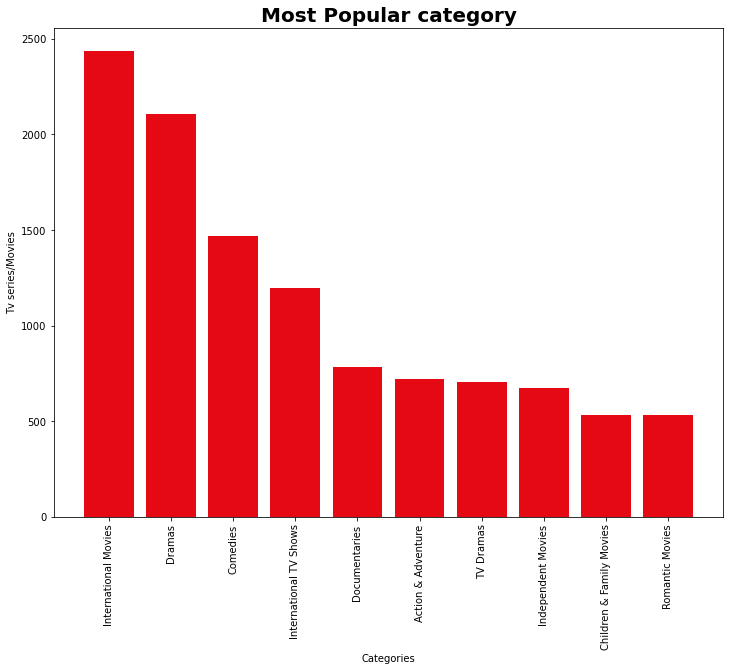

In [36]:
import matplotlib.pyplot as plt

height = list(categories_dict.values())[:10]
bars = list(categories_dict.keys())[:10]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height,color = "#E50914")
plt.xlabel('Categories') 
plt.xticks(y_pos, bars)
plt.ylabel('Tv series/Movies') 
plt.title('Most Popular category',fontsize=20, fontweight='bold') 

plt.xticks(rotation=90)

# Show graphic
plt.show()

In [37]:
import datetime

def get_month(string_time):
    try:
        clean = string_time.strip()
        parsed = datetime.datetime.strptime(clean, '%B %d, %Y')
        #print(parsed)
        return int(parsed.month) - 1

    except Exception as e:
        return e

In [38]:
netflix_df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [39]:
netflix_df['added_month'] = netflix_df['date_added'].apply(
    get_month)
with_year = netflix_df[netflix_df['added_month'] != 0]
#with_year = with_year.sort_values(by=['added_month'])

with_year
#netflix_df['added_month']

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
5         s6  TV Show                                       46   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
5           Serdar Akar  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
5                                                Turkey        July 1, 2017   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
5             2016  TV-MA   1 Season   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
5       International TV Shows, TV Dramas, TV Mysteries   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description added_month  
0     In a future where the elite inhabit an island ...           

[7, 11, 10, 6, 5, 3, 9, 4, 2, 8, 1]
[833, 785, 738, 669, 619, 618, 601, 600, 543, 542, 472]


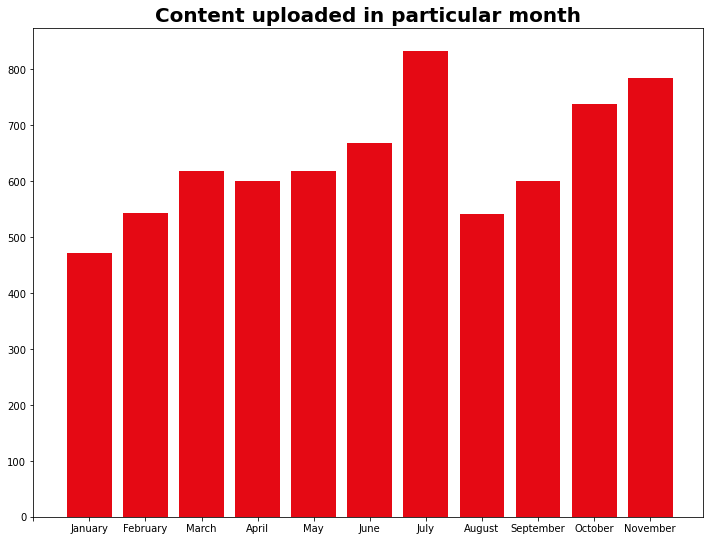

In [40]:
# am si eu un bug aici, cine ma ajuta si pe mine :)) ?

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

bars = list(with_year.added_month.unique()[:11])
height = list(with_year.added_month.value_counts()[:11])
print(bars)
print(height)

plt.bar(bars, height, color = "#E50914" )
#plt.xticks(bars, ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.xticks( np.arange(12), (' ', 'January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
#plt.xticks.labels = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#bars = list()

plt.title('Content uploaded in particular month',fontsize=20, fontweight='bold') 
plt.show()

In [41]:
#netflix_df['date_added']
netflix_df['pd_date'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.sort_values(by='pd_date', inplace=True)
netflix_df.set_index(['pd_date'], inplace=True)

In [42]:
import math

month_array = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
netflix_df['date_year'] = netflix_df.index.year
netflix_df['date_month'] = netflix_df.index.month
netflix_df.dropna(subset = ["date_month"], inplace=True)
netflix_df['date_month'] = netflix_df['date_month'].apply(lambda current_data: month_array[int(current_data) - 1])
#netflix_df['one'] = 1

In [43]:
#print(netflix_df.head())

netflix_df_filtered = netflix_df[netflix_df['date_year'].between(2017, 2020)]
netflix_df_filtered = netflix_df_filtered.sort_values(by=['added_month'])

netflix_pivot = pd.pivot_table(
netflix_df_filtered,
values = 'show_id', index='date_year', columns='date_month', aggfunc='count', fill_value=0)
netflix_pivot = netflix_pivot.reindex(month_array, axis=1)
netflix_pivot = netflix_pivot.T
netflix_pivot.head()

date_year   2017.0  2018.0  2019.0  2020.0
date_month                                
January         72     130     162     228
February        84      88     159     117
March          140     175     179     152
April           95     118     171     188
May             88     101     159     173

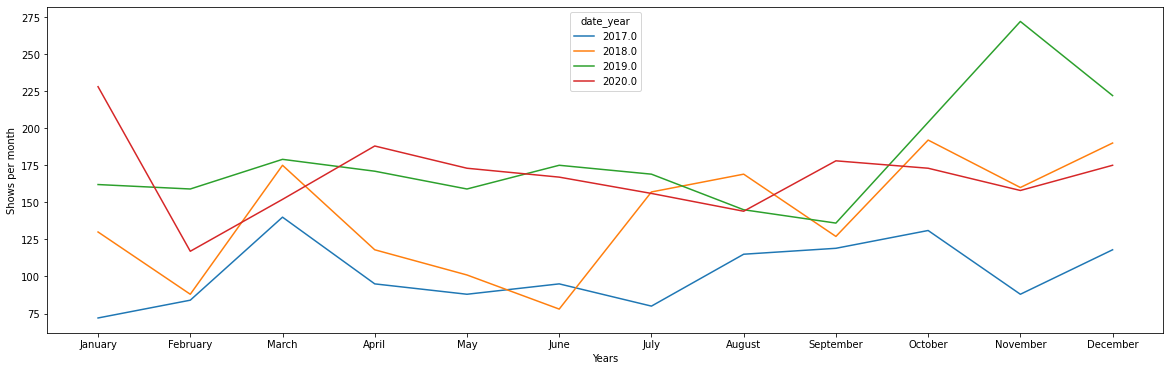

In [44]:
ax = netflix_pivot.plot(kind="line")
fig = ax.get_figure()
fig.set_size_inches(20, 6)
locs, labels = plt.xticks()

plt.xticks( np.arange(12), ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.set_xlabel("Years")
ax.set_ylabel("Shows per month")

plt.show()

In [45]:
#!pip install wordcloud

In [47]:
netflix_df_copy.dropna(subset = ["description"], inplace=True)
all_descriptions = " ".join(description for description in netflix_df_copy.description)
all_descriptions = all_descriptions.replace(',', '')

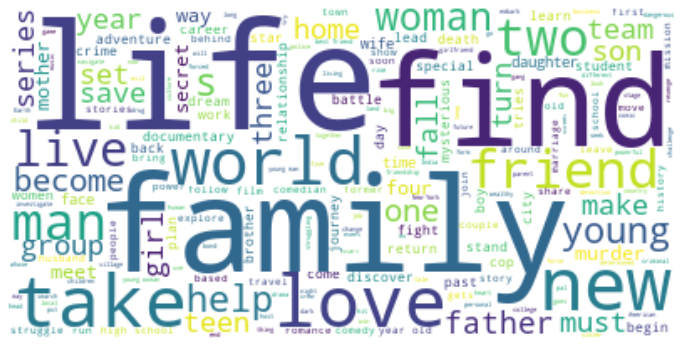

In [48]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(background_color="white").generate(all_descriptions)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

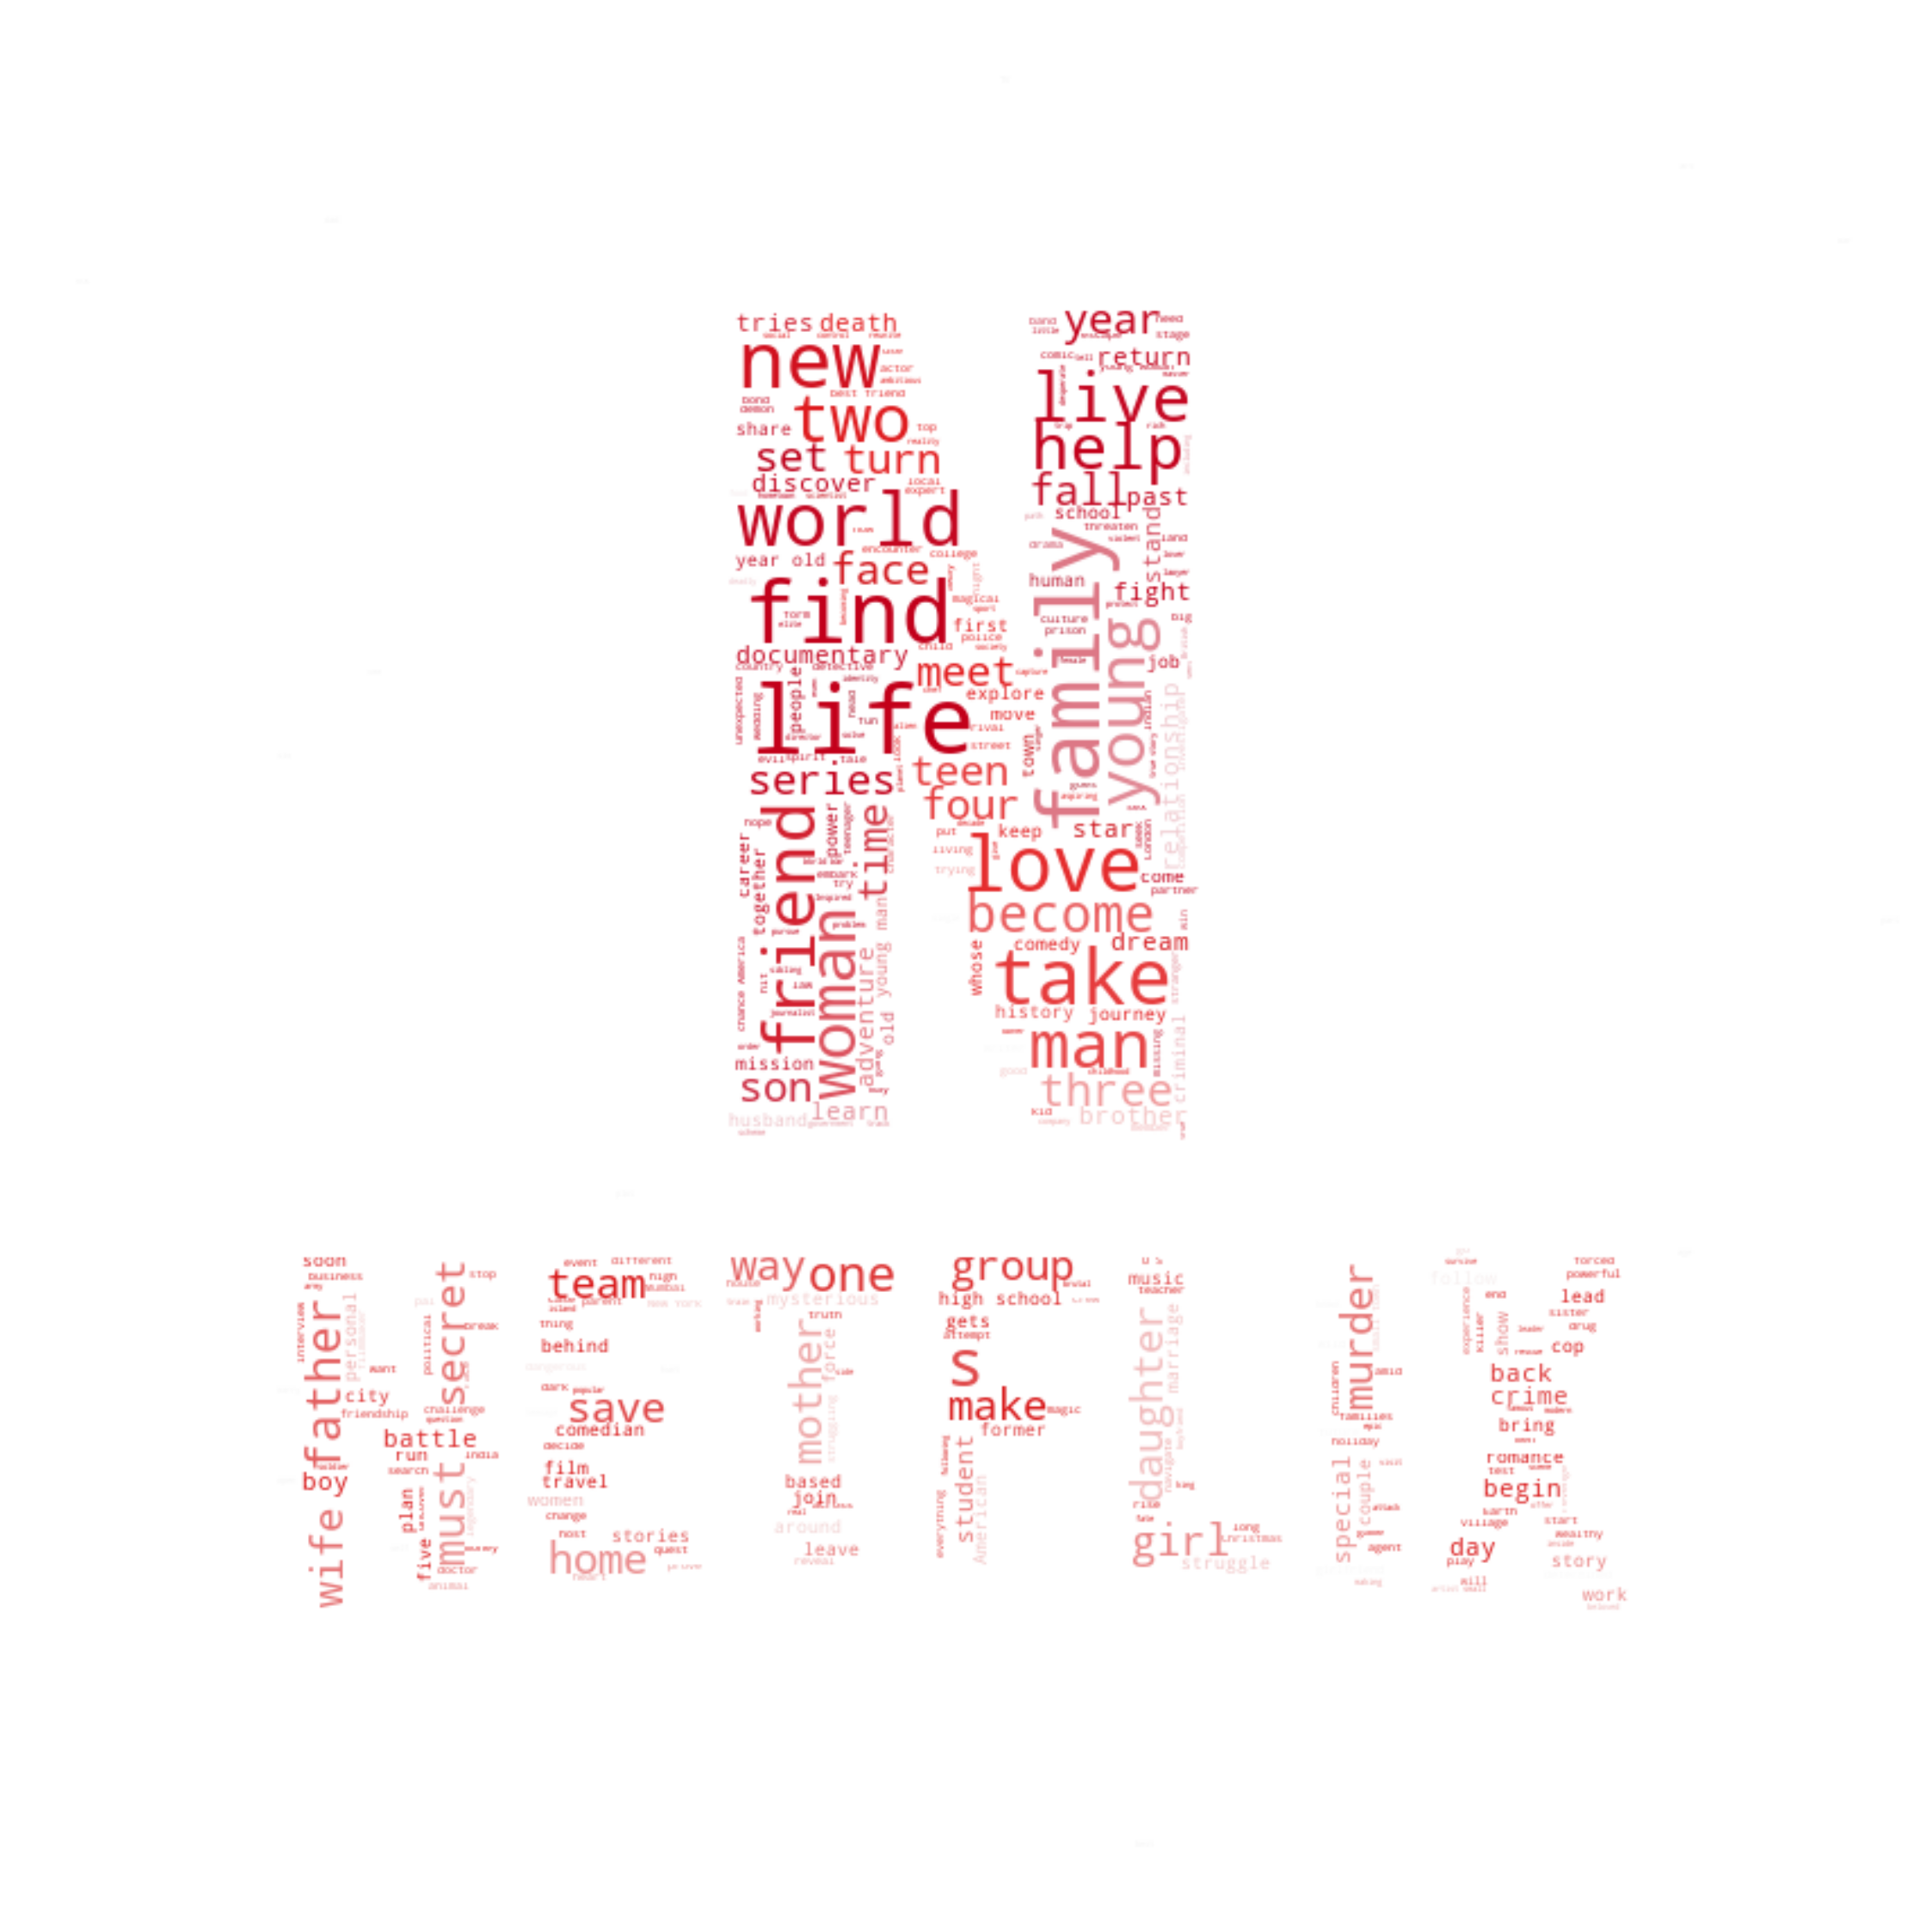

In [49]:
from PIL import Image

mask = np.array(Image.open('netflix_1.png'))
wordcloud_image = WordCloud(background_color="white", mode="RGBA", max_words=2000, mask=mask, width=5200, height=3600).generate(all_descriptions)

image_generator = ImageColorGenerator(mask)
plt.figure(figsize=[40,50])
plt.axis("off")
plt.imshow(wordcloud_image.recolor(color_func=image_generator), interpolation="bilinear")

In [50]:
netflix_df_copy.head()

show_id     type                        title  \
pd_date                                                    
2008-01-01   s7114    Movie         To and From New York   
2008-02-04   s1766  TV Show              Dinner for Five   
2009-05-05   s3249    Movie      Just Another Love Story   
2009-11-18   s5766    Movie                     Splatter   
2010-11-01   s3841    Movie  Mad Ron's Prevues from Hell   

                        director  \
pd_date                            
2008-01-01  Sorin Dan Mihalcescu   
2008-02-04                   NaN   
2009-05-05          Ole Bornedal   
2009-11-18             Joe Dante   
2010-11-01            Jim Monaco   

                                                         cast        country  \
pd_date                                                                        
2008-01-01  Barbara King, Shaana Diya, John Krisiukenas, Y...  United States   
2008-02-04                                                NaN  United States   
2009-05-05  Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...        Denmark   
2009-11-18  Corey Feldman, Tony Todd, Tara Leigh, Erin Way...  United States   
2010-11-01  Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...  United States   

                   date_added  release_year rating  duration  \
pd_date                                                        
2008-01-01    January 1, 2008          2006  TV-MA    81 min   
2008-02-04   February 4, 2008          2007  TV-MA  1 Season   
2009-05-05        May 5, 2009          2007  TV-MA   104 min   
2009-11-18  November 18, 2009          2009  TV-MA    29 min   
2010-11-01   November 1, 2010          1987     NR    84 min   

                                        listed_in  \
pd_date                                             
2008-01-01  Dramas, Independent Movies, Thrillers   
2008-02-04           Stand-Up Comedy & Talk Shows   
2009-05-05           Dramas, International Movies   
2009-11-18                          Horror Movies   
2010-11-01             Cult Movies, Horror Movies   

                                                  description added_month  \
pd_date                                                                     
2008-01-01  While covering a story in New York City, a Sea...           0   
2008-02-04  In each episode, four celebrities join host Jo...           1   
2009-05-05  When he causes a car accident that leaves a yo...           4   
2009-11-18  After committing suicide, a washed-up rocker r...          10   
2010-11-01  This collection cherry-picks trailers, forgott...          10   

            date_year date_month  
pd_date                           
2008-01-01     2008.0    January  
2008-02-04     2008.0   February  
2009-05-05     2009.0        May  
2009-11-18     2009.0   November  
2010-11-01     2010.0   November

In [51]:
#netflix_df['one'].astype(int)

netflix_pivot_year = pd.pivot_table(
netflix_df_copy,
values = 'show_id', index='type', columns='date_year', aggfunc='count', fill_value=0)
netflix_pivot_year.head()
#netflix_pivot_year.dtypes 

date_year  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  \
type                                                                        
Movie           1       2       1      13       3       6      19      58   
TV Show         1       0       0       0       0       5       6      30   

date_year  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  
type                                                       
Movie         258     864    1255    1497    1312      88  
TV Show       185     361     430     656     697      29

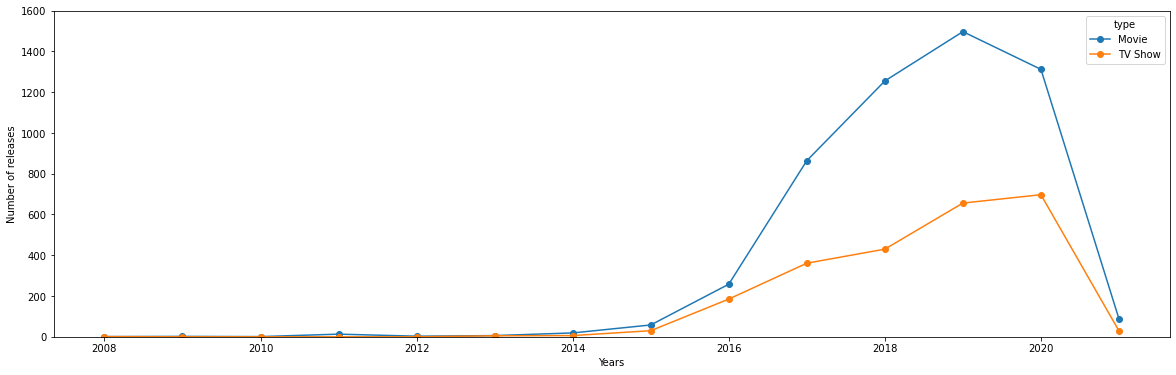

In [52]:
ax = netflix_pivot_year.T.plot(kind="line", ylim=(0, 1600), marker='o')
#ax.ylim  = (0, 5000)
fig = ax.get_figure()
fig.set_size_inches(20, 6)
locs, labels = plt.xticks()

#plt.xticks( np.arange(4), ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.set_xlabel("Years")
ax.set_ylabel("Number of releases")

plt.show()

In [53]:
country_one_hot_df=netflix_df_copy[["country"]]
country_one_hot_df.reset_index(drop=True, inplace=True)
country_one_hot_df = pd.concat([country_one_hot_df.drop('country', 1), country_one_hot_df['country'].str.get_dummies(sep=",")], 1)
country_one_hot_df

incercare = pd.DataFrame(np.sum(country_one_hot_df.values, axis=0), columns=['sum'])
country_count_df = country_one_hot_df.agg(['sum'])
bla_df = pd.DataFrame()
bla_df = bla_df.append(country_count_df, ignore_index=True, )
bla_df.reset_index(drop=True, inplace=True)
print(bla_df.T)
columns = bla_df.columns
columns = bla_df.columns
columns_no_space = []
for column in columns:
    if column[0] == ' ':
        column = column[1:]
    
    columns_no_space.append(column)

final_df = pd.DataFrame(columns_no_space, columns =['country'])
final_df['count'] = bla_df.T.values
print(final_df)


               0
 Afghanistan   1
 Albania       1
 Algeria       2
 Angola        1
 Argentina    14
...           ..
Uruguay        9
Venezuela      2
Vietnam        5
West Germany   1
Zimbabwe       1

[187 rows x 1 columns]
          country  count
0     Afghanistan      1
1         Albania      1
2         Algeria      2
3          Angola      1
4       Argentina     14
..            ...    ...
182       Uruguay      9
183     Venezuela      2
184       Vietnam      5
185  West Germany      1
186      Zimbabwe      1

[187 rows x 2 columns]


In [54]:
import plotly.express as px

fig = px.treemap(final_df, 
                 path=['country'], 
                 values='count',
                )
fig.show()

In [55]:
# week urmatoare

#import matplotlib.pyplot as plt
#show_type = netflix_df['type']
#labbels = 'Movie','TV Show'
#plt.pie(show_type,labels=labbels,autopct='%1.1f%%')
#plt.title('My Title')
#plt.axis('equal')
#plt.show()
netflix_df_2 = netflix_df
netflix_df_2['type_name'] = netflix_df_2['type']
#netflix_df_2['type'] = pd.Categorical(netflix_df_2.type)
#netflix_df_2.type = pd.Categorical.from_array(netflix_df_2.type).codes
netflix_df_2['type'].replace(to_replace=['TV Show', 'Movie'], value=[1, 2], inplace=True)
netflix_df_2



show_id  type                        title  \
pd_date                                                 
2008-01-01   s7114     2         To and From New York   
2008-02-04   s1766     1              Dinner for Five   
2009-05-05   s3249     2      Just Another Love Story   
2009-11-18   s5766     2                     Splatter   
2010-11-01   s3841     2  Mad Ron's Prevues from Hell   
...            ...   ...                          ...   
2021-01-15   s7645     2                     Wish You   
2021-01-15   s6635     1                The Magicians   
2021-01-16   s1674     2                  Death of Me   
2021-01-16   s5060     2                 Radium Girls   
2021-01-16    s206     2              A Monster Calls   

                                    director  \
pd_date                                        
2008-01-01              Sorin Dan Mihalcescu   
2008-02-04                               NaN   
2009-05-05                      Ole Bornedal   
2009-11-18                         Joe Dante   
2010-11-01                        Jim Monaco   
...                                      ...   
2021-01-15                       Sung Do-jun   
2021-01-15                               NaN   
2021-01-16               Darren Lynn Bousman   
2021-01-16  Lydia Dean Pilcher, Ginny Mohler   
2021-01-16                       J.A. Bayona   

                                                         cast  \
pd_date                                                         
2008-01-01  Barbara King, Shaana Diya, John Krisiukenas, Y...   
2008-02-04                                                NaN   
2009-05-05  Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...   
2009-11-18  Corey Feldman, Tony Todd, Tara Leigh, Erin Way...   
2010-11-01  Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...   
...                                                       ...   
2021-01-15                     Kang In-soo, Lee Sang, Soo-bin   
2021-01-15  Jason Ralph, Arjun Gupta, Hale Appleman, Stell...   
2021-01-16  Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...   
2021-01-16  Joey King, Abby Quinn, Cara Seymour, Scott She...   
2021-01-16  Lewis MacDougall, Sigourney Weaver, Felicity J...   

                                         country         date_added  \
pd_date                                                               
2008-01-01                         United States    January 1, 2008   
2008-02-04                         United States   February 4, 2008   
2009-05-05                               Denmark        May 5, 2009   
2009-11-18                         United States  November 18, 2009   
2010-11-01                         United States   November 1, 2010   
...                                          ...                ...   
2021-01-15                                   NaN   January 15, 2021   
2021-01-15                 United States, Canada   January 15, 2021   
2021-01-16               United States, Thailand   January 16, 2021   
2021-01-16                         United States   January 16, 2021   
2021-01-16  United Kingdom, Spain, United States   January 16, 2021   

            release_year rating   duration  \
pd_date                                      
2008-01-01          2006  TV-MA     81 min   
2008-02-04          2007  TV-MA   1 Season   
2009-05-05          2007  TV-MA    104 min   
2009-11-18          2009  TV-MA     29 min   
2010-11-01          1987     NR     84 min   
...                  ...    ...        ...   
2021-01-15          2021  TV-PG    102 min   
2021-01-15          2020  TV-MA  5 Seasons   
2021-01-16          2020      R     94 min   
2021-01-16          2018  TV-14    103 min   
2021-01-16          2016  PG-13    108 min   

                                             listed_in  \
pd_date                                                  
2008-01-01       Dramas, Independent Movies, Thrillers   
2008-02-04                Stand-Up Comedy & Talk Shows   
2009-05-05                Dramas, Internati

In [56]:
fig = px.pie(netflix_df, values='type', names='type_name')
fig.show()

In [64]:
ratings_from_imdb = pd.read_csv('IMDb _ratings.csv')
titles_from_imdb = pd.read_csv('IMDb_movies.csv')

#titles_from_imdb = titles_from_imdb[['title', 'year', 'genre']]
ratings_from_imdb

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



imdb_title_id  weighted_average_vote  total_votes  mean_vote  \
0         tt0000009                    5.9          154        5.9   
1         tt0000574                    6.1          589        6.3   
2         tt0001892                    5.8          188        6.0   
3         tt0002101                    5.2          446        5.3   
4         tt0002130                    7.0         2237        6.9   
...             ...                    ...          ...        ...   
85850     tt9908390                    5.3          398        5.5   
85851     tt9911196                    7.7          724        7.9   
85852     tt9911774                    7.9          265        7.8   
85853     tt9914286                    6.4          194        9.4   
85854     tt9914942                    6.7          102        6.8   

       median_vote  votes_10  votes_9  votes_8  votes_7  votes_6  ...  \
0              6.0        12        4       10       43       28  ...   
1              6.0        57       18       58      137      139  ...   
2              6.0         6        6       17       44       52  ...   
3              5.0        15        8       16       62       98  ...   
4              7.0       210      225      436      641      344  ...   
...            ...       ...      ...      ...      ...      ...  ...   
85850          6.0        13        9       26       65      104  ...   
85851          8.0        65      139      288      170       42  ...   
85852          8.0        63       29       61       61       31  ...   
85853         10.0       176        0        2        2        1  ...   
85854          7.0         4        4       21       35       27  ...   

       females_30age_avg_vote  females_30age_votes  females_45age_avg_vote  \
0                         5.7                 13.0                     4.5   
1                         6.2                 23.0                     6.6   
2                         5.8                  4.0                     6.8   
3                         5.5                 14.0                     6.1   
4                         7.3                 82.0                     7.4   
...                       ...                  ...                     ...   
85850                     5.7                 11.0                     5.0   
85851                     8.0                 47.0                     7.3   
85852                     NaN                  NaN                     NaN   
85853                     NaN                  NaN                     7.0   
85854                     6.8                  4.0                     7.5   

       females_45age_votes  top1000_voters_rating  top1000_voters_votes  \
0                      4.0                    5.7                  34.0   
1                     14.0                    6.4                  66.0   
2                      7.0                    5.4                  32.0   
3                     21.0                    4.9                  57.0   
4                     77.0                    6.9                 139.0   
...                    ...                    ...                   ...   
85850                  2.0                    5.5                  12.0   
85851                 30.0                    7.0                   6.0   
85852                  NaN                    1.0                   1.0   
85853                  1.0                    4.0                   3.0   
85854                  4.0                    7.0                   4.0   

       us_voters_rating  us_voters_votes  non_us_voters_rating  \
0                   6.4             51.0                   6.0   
1                   6.0             96.0                   6.2   
2                   6.2             31.0                   5.9   
3                   5.5            207.0                   4.7   
4                   7.0            488.0                   7.0   
...                 ...              ...              

In [67]:
ratings_df = pd.DataFrame({'title' : titles_from_imdb.title, 'rating': ratings_from_imdb.weighted_average_vote, 'genre': titles_from_imdb.genre, 'year': titles_from_imdb.year})

ratings_df.drop_duplicates(subset=['title', 'year', 'genre'], inplace=True)
ratings_df.dropna()

title  rating                      genre  year
0                          Miss Jerry     5.9                    Romance  1894
1         The Story of the Kelly Gang     6.1    Biography, Crime, Drama  1906
2                      Den sorte drøm     5.8                      Drama  1911
3                           Cleopatra     5.2             Drama, History  1912
4                           L'Inferno     7.0  Adventure, Drama, Fantasy  1911
...                               ...     ...                        ...   ...
85850                         Le lion     5.3                     Comedy  2020
85851  De Beentjes van Sint-Hildegard     7.7              Comedy, Drama  2020
85852       Padmavyuhathile Abhimanyu     7.9                      Drama  2019
85853               Sokagin Çocuklari     6.4              Drama, Family  2019
85854      La vida sense la Sara Amat     6.7                      Drama  2019

[85843 rows x 4 columns]

In [80]:
netflix_imdb = ratings_df.merge(netflix_df, left_on='title', right_on='title', how='inner')
netflix_imdb = netflix_imdb.sort_values(by='rating_x', ascending=False)
netflix_imdb.dropna()

title  rating_x                      genre  year show_id  \
988              Innocent       9.0                     Comedy  2017   s3009   
379      Schindler's List       8.9  Biography, Drama, History  1993   s5431   
397          Pulp Fiction       8.9               Crime, Drama  1994   s5003   
1296            Inception       8.8  Action, Adventure, Sci-Fi  2010   s2980   
226              Gol Maal       8.6            Comedy, Romance  1979   s2464   
...                   ...       ...                        ...   ...     ...   
842             The Vault       1.9                     Action  2005   s6978   
581            Himmatwala       1.7             Action, Comedy  2013   s2744   
2186              Aerials       1.6    Drama, Sci-Fi, Thriller  2016    s319   
1683  Welcome to New York       1.6              Comedy, Drama  2018   s7528   
1201                 Pink       1.6              Comedy, Drama  2016   s4863   

      type                 director  \
988      1               Seren Yüce   
379      2         Steven Spielberg   
397      2        Quentin Tarantino   
1296     2        Christopher Nolan   
226      2     Hrishikesh Mukherjee   
...    ...                      ...   
842      2                 Dan Bush   
581      2               Sajid Khan   
2186     2               S.A. Zaidi   
1683     2             Abel Ferrara   
1201     2  Aniruddha Roy Chowdhury   

                                                   cast  \
988   Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...   
379   Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...   
397   John Travolta, Samuel L. Jackson, Uma Thurman,...   
1296  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   
226   Amol Palekar, Bindiya Goswami, Deven Verma, Ut...   
...                                                 ...   
842   Taryn Manning, Francesca Eastwood, James Franc...   
581   Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...   
2186  Saga Alyasery, Ana Druzhynina, Mansour Al Fele...   
1683  Gérard Depardieu, Jacqueline Bisset, Marie Mou...   
1201  Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...   

                            country         date_added  release_year rating_y  \
988                          Turkey   January 23, 2019          2017    TV-MA   
379                   United States      April 1, 2018          1993        R   
397                   United States    January 1, 2019          1994        R   
1296  United States, United Kingdom    January 1, 2020          2010    PG-13   
226                           India  December 31, 2019          1979    TV-PG   
...                             ...                ...           ...      ...   
842                   United States    January 1, 2018          2017    TV-MA   
581                           India   November 1, 2018          2013    TV-14   
2186           United Arab Emirates        May 7, 2020          2016    TV-14   
1683          United States, France     March 23, 2017          2014        R   
1201                          India   January 20, 2017          2016    TV-14   

      duration                                          listed_in  \
988   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
379    195 min                             Classic Movies, Dramas   
397    154 min                Classic Movies, Cult Movies, Dramas   
1296   148 min    Action & Adventure, Sci-Fi & Fantasy, Thrillers   
226    137 min     Classic Movies, Comedies, International Movies   
...        ...                                                ...   
842     92 min                           Horror Movies, Thrillers   
581    140 min  Action & Adventure, Comedies, International Mo...   
2186    90 min             International Movies, Sci-Fi & Fantasy   
1683   108 min                         Dramas, Independent Movies   
1201   130 min                       Dramas, International Movies   

                                            description added_month  \
988   In

In [82]:
import plotly.express as px
fig =px.sunburst(
    netflix_imdb[0:15],
    path=['title','country'],
    values='rating_x',
    color='rating_x')
fig.show()

In [86]:
movies=netflix_df[netflix_df['type']=='Movie']


movies['duration'] = movies['duration'].str.replace(' min','')
movies['duration'] = movies['duration'].astype(str).astype(int)
movies['duration']

<ipython-input-86-394147501889>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-394147501889>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

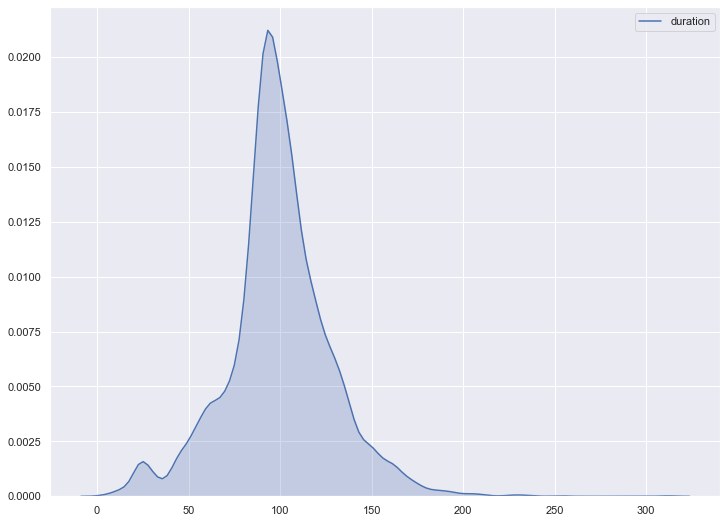

In [89]:
import seaborn as sns

sns.set(style="darkgrid")
sns.kdeplot(data=movies['duration'], shade=True)